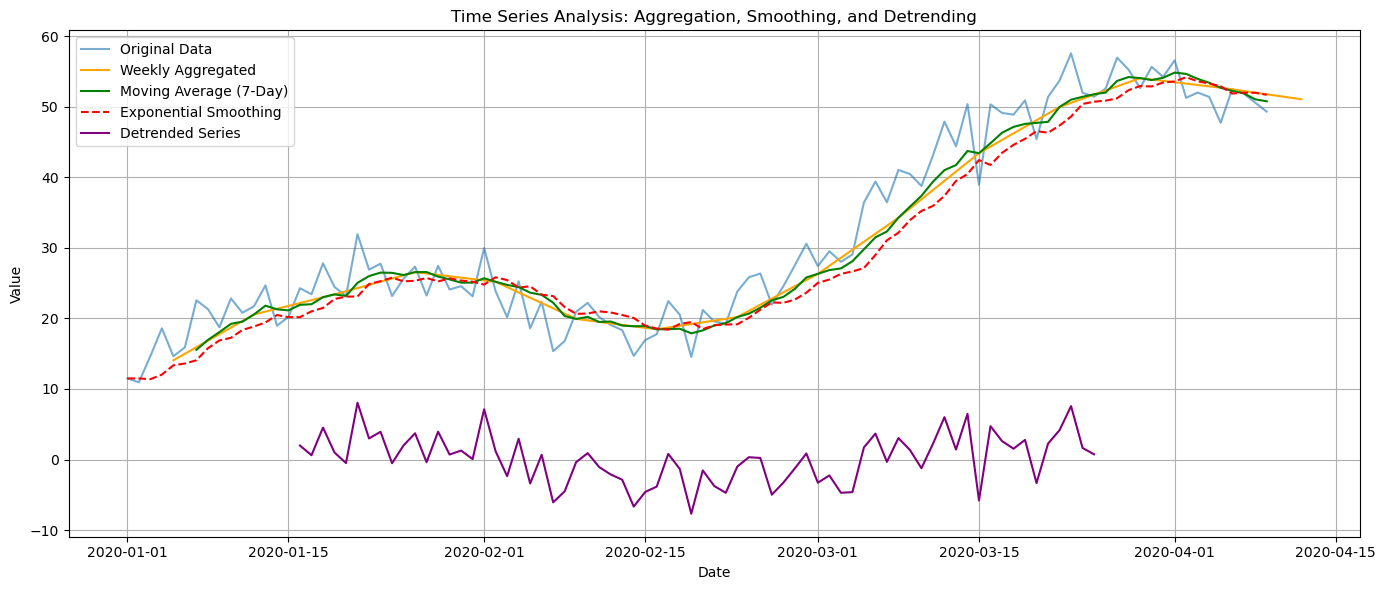

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
np.random.seed(42)
date_range = pd.date_range(start='2020-01-01', periods=100, freq='D')
trend = np.linspace(10, 50, 100)
seasonality = 10 * np.sin(np.linspace(0, 3 * np.pi, 100))
noise = np.random.normal(scale=3, size=100)
data = trend + seasonality + noise
ts = pd.Series(data, index=date_range)
ts_weekly = ts.resample('W').mean()
rolling_mean = ts.rolling(window=7).mean()
exp_smoothing = SimpleExpSmoothing(ts).fit(smoothing_level=0.2, optimized=False)
exp_smoothed = exp_smoothing.fittedvalues
decomposition = seasonal_decompose(ts, model='additive', period=30)
trend_component = decomposition.trend
detrended = ts - trend_component
plt.figure(figsize=(14, 6))
plt.plot(ts, label='Original Data', alpha=0.6)
plt.plot(ts_weekly, label='Weekly Aggregated', color='orange')
plt.plot(rolling_mean, label='Moving Average (7-Day)', color='green')
plt.plot(exp_smoothed, label='Exponential Smoothing', color='red', linestyle='--')
plt.plot(detrended, label='Detrended Series', color='purple')
plt.title('Time Series Analysis: Aggregation, Smoothing, and Detrending')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
